# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import collections
import os
import json
import pickle
import keras
import warnings
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

warnings.filterwarnings('ignore')
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Using TensorFlow backend.


Device mapping:



# Load the Train Test Split

In [2]:
X_train = np.load(os.path.join("..", "IPD", "x_train.npy"))
X_test = np.load(os.path.join("..", "IPD", "x_test.npy"))
Y_train = np.load(os.path.join("..", "IPD", "y_train.npy"))
Y_test = np.load(os.path.join("..", "IPD", "y_test.npy"))
print("Training samples : {} \nTesting Samples : {}".format(X_train.shape, X_test.shape))
print("Training Labels : {} \nTesting Labels : {}".format(Y_train.shape, Y_test.shape))

Training samples : (332, 250, 12) 
Testing Samples : (83, 250, 12)
Training Labels : (332,) 
Testing Labels : (83,)


In [3]:
_, num_timeframes, num_features = X_train.shape

# Reshape data for model

In [4]:
X_train = X_train.reshape((-1,num_timeframes,num_features,1))
X_test = X_test.reshape((-1,num_timeframes,num_features,1))
Y_train = keras.utils.to_categorical(Y_train, 6)
Y_test = keras.utils.to_categorical(Y_test, 6)
print("Training samples : {} \nTesting Samples : {}".format(X_train.shape, X_test.shape))
print("Training Labels : {} \nTesting Labels : {}".format(Y_train.shape, Y_test.shape))

Training samples : (332, 250, 12, 1) 
Testing Samples : (83, 250, 12, 1)
Training Labels : (332, 6) 
Testing Labels : (83, 6)


# CNN Model

In [30]:
input_shape = X_train[0].shape
batch_size = 5
epochs = 500

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='tanh',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Conv2D(12, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(12, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 246, 8, 6)         156       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 123, 8, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 121, 6, 12)        660       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 60, 6, 12)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 60, 6, 12)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4320)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 12)               

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(X_test, Y_test))

Train on 332 samples, validate on 83 samples
Epoch 1/500
332/332 [==============================] - 1s 3ms/step - loss: 1.3836 - acc: 0.4608 - val_loss: 1.2073 - val_acc: 0.5783
Epoch 2/500
332/332 [==============================] - 0s 1ms/step - loss: 1.1223 - acc: 0.5994 - val_loss: 1.0881 - val_acc: 0.5904
Epoch 3/500
332/332 [==============================] - 0s 1ms/step - loss: 0.9328 - acc: 0.6325 - val_loss: 1.1303 - val_acc: 0.5904
Epoch 4/500
332/332 [==============================] - 0s 1ms/step - loss: 0.8202 - acc: 0.7139 - val_loss: 0.7901 - val_acc: 0.7229
Epoch 5/500
332/332 [==============================] - 0s 1ms/step - loss: 0.7149 - acc: 0.7590 - val_loss: 0.6784 - val_acc: 0.7229
Epoch 6/500
332/332 [==============================] - 0s 1ms/step - loss: 0.6692 - acc: 0.7681 - val_loss: 0.7931 - val_acc: 0.6506
Epoch 7/500
332/332 [==============================] - 0s 1ms/step - loss: 0.6218 - acc: 0.7922 - val_loss: 0.6122 - val_acc: 0.7831
Epoch 8/500
332/332 [===

Epoch 62/500
332/332 [==============================] - 0s 1ms/step - loss: 0.1505 - acc: 0.9518 - val_loss: 0.2914 - val_acc: 0.8795
Epoch 63/500
332/332 [==============================] - 0s 1ms/step - loss: 0.1456 - acc: 0.9578 - val_loss: 0.2966 - val_acc: 0.8675
Epoch 64/500
332/332 [==============================] - 0s 1ms/step - loss: 0.1306 - acc: 0.9669 - val_loss: 0.2658 - val_acc: 0.8675
Epoch 65/500
332/332 [==============================] - 0s 1ms/step - loss: 0.1445 - acc: 0.9608 - val_loss: 0.3171 - val_acc: 0.8795
Epoch 66/500
332/332 [==============================] - 0s 1ms/step - loss: 0.1270 - acc: 0.9669 - val_loss: 0.2258 - val_acc: 0.9036
Epoch 67/500
332/332 [==============================] - 0s 1ms/step - loss: 0.1302 - acc: 0.9578 - val_loss: 0.2471 - val_acc: 0.8795
Epoch 68/500
332/332 [==============================] - 0s 1ms/step - loss: 0.1350 - acc: 0.9518 - val_loss: 0.2391 - val_acc: 0.9036
Epoch 69/500
332/332 [==============================] - 0s 1ms

332/332 [==============================] - 0s 1ms/step - loss: 0.0724 - acc: 0.9699 - val_loss: 0.2311 - val_acc: 0.9157
Epoch 123/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0643 - acc: 0.9819 - val_loss: 0.2218 - val_acc: 0.9157
Epoch 124/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0906 - acc: 0.9699 - val_loss: 0.2558 - val_acc: 0.9036
Epoch 125/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0607 - acc: 0.9819 - val_loss: 0.2093 - val_acc: 0.9036
Epoch 126/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0543 - acc: 0.9880 - val_loss: 0.2626 - val_acc: 0.8916
Epoch 127/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0801 - acc: 0.9789 - val_loss: 0.2091 - val_acc: 0.9398
Epoch 128/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0841 - acc: 0.9699 - val_loss: 0.2204 - val_acc: 0.9157
Epoch 129/500
332/332 [==============================] - 0s 1ms/step 

Epoch 183/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0734 - acc: 0.9759 - val_loss: 0.2065 - val_acc: 0.9277
Epoch 184/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0426 - acc: 0.9880 - val_loss: 0.1868 - val_acc: 0.9398
Epoch 185/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0411 - acc: 0.9940 - val_loss: 0.2811 - val_acc: 0.9277
Epoch 186/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0418 - acc: 0.9849 - val_loss: 0.2151 - val_acc: 0.9036
Epoch 187/500
332/332 [==============================] - ETA: 0s - loss: 0.0434 - acc: 0.981 - 0s 1ms/step - loss: 0.0442 - acc: 0.9819 - val_loss: 0.2364 - val_acc: 0.9157
Epoch 188/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0686 - acc: 0.9759 - val_loss: 0.2136 - val_acc: 0.9277
Epoch 189/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0705 - acc: 0.9789 - val_loss: 0.1987 - val_acc: 0.9398
Epoch 190/500
332

332/332 [==============================] - 0s 1ms/step - loss: 0.0521 - acc: 0.9789 - val_loss: 0.2233 - val_acc: 0.9398
Epoch 244/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0507 - acc: 0.9910 - val_loss: 0.2538 - val_acc: 0.9157
Epoch 245/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0327 - acc: 0.9940 - val_loss: 0.1762 - val_acc: 0.9398
Epoch 246/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0351 - acc: 0.9849 - val_loss: 0.3189 - val_acc: 0.9157
Epoch 247/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0459 - acc: 0.9849 - val_loss: 0.3271 - val_acc: 0.9157
Epoch 248/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0396 - acc: 0.9880 - val_loss: 0.2651 - val_acc: 0.9277
Epoch 249/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0239 - acc: 0.9940 - val_loss: 0.2963 - val_acc: 0.9157
Epoch 250/500
332/332 [==============================] - 0s 1ms/step 

Epoch 303/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0481 - acc: 0.9849 - val_loss: 0.2195 - val_acc: 0.9157
Epoch 304/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0292 - acc: 0.9910 - val_loss: 0.2158 - val_acc: 0.9398
Epoch 305/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0242 - acc: 0.9910 - val_loss: 0.1928 - val_acc: 0.9518
Epoch 306/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0279 - acc: 0.9910 - val_loss: 0.2791 - val_acc: 0.9157
Epoch 307/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0420 - acc: 0.9819 - val_loss: 0.2494 - val_acc: 0.9398
Epoch 308/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0251 - acc: 0.9940 - val_loss: 0.3361 - val_acc: 0.9157
Epoch 309/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0369 - acc: 0.9910 - val_loss: 0.2768 - val_acc: 0.9277
Epoch 310/500
332/332 [==============================] 

332/332 [==============================] - 0s 1ms/step - loss: 0.0280 - acc: 0.9970 - val_loss: 0.2277 - val_acc: 0.9398
Epoch 364/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0263 - acc: 0.9910 - val_loss: 0.2555 - val_acc: 0.9157
Epoch 365/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0333 - acc: 0.9880 - val_loss: 0.2376 - val_acc: 0.9277
Epoch 366/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0143 - acc: 0.9970 - val_loss: 0.2522 - val_acc: 0.9398
Epoch 367/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0227 - acc: 0.9910 - val_loss: 0.2575 - val_acc: 0.9277
Epoch 368/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0368 - acc: 0.9910 - val_loss: 0.2740 - val_acc: 0.9398
Epoch 369/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0370 - acc: 0.9819 - val_loss: 0.3089 - val_acc: 0.9398
Epoch 370/500
332/332 [==============================] - 0s 1ms/step 

332/332 [==============================] - 0s 1ms/step - loss: 0.0264 - acc: 0.9970 - val_loss: 0.2663 - val_acc: 0.9398
Epoch 424/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0468 - acc: 0.9819 - val_loss: 0.2764 - val_acc: 0.9398
Epoch 425/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0249 - acc: 0.9910 - val_loss: 0.2218 - val_acc: 0.9398
Epoch 426/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0306 - acc: 0.9910 - val_loss: 0.2394 - val_acc: 0.9398
Epoch 427/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0500 - acc: 0.9819 - val_loss: 0.2631 - val_acc: 0.9398
Epoch 428/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0296 - acc: 0.9910 - val_loss: 0.2432 - val_acc: 0.9398
Epoch 429/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0259 - acc: 0.9940 - val_loss: 0.1785 - val_acc: 0.9398
Epoch 430/500
332/332 [==============================] - 0s 1ms/step 

332/332 [==============================] - 0s 1ms/step - loss: 0.0254 - acc: 0.9970 - val_loss: 0.2124 - val_acc: 0.9157
Epoch 484/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0281 - acc: 0.9940 - val_loss: 0.2404 - val_acc: 0.9398
Epoch 485/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0335 - acc: 0.9819 - val_loss: 0.1715 - val_acc: 0.9398
Epoch 486/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0251 - acc: 0.9910 - val_loss: 0.1956 - val_acc: 0.9398
Epoch 487/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0239 - acc: 0.9910 - val_loss: 0.1733 - val_acc: 0.9518
Epoch 488/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0276 - acc: 0.9880 - val_loss: 0.1632 - val_acc: 0.9398
Epoch 489/500
332/332 [==============================] - 0s 1ms/step - loss: 0.0426 - acc: 0.9819 - val_loss: 0.1388 - val_acc: 0.9398
Epoch 490/500
332/332 [==============================] - 0s 1ms/step 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


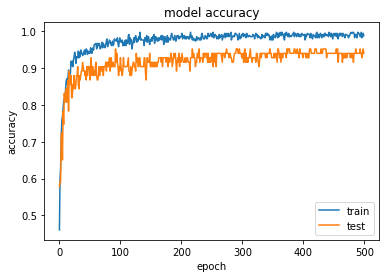

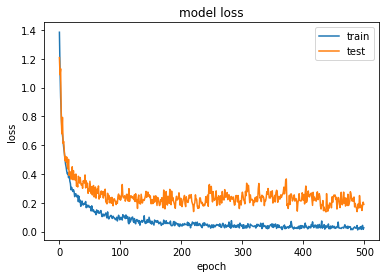

In [23]:
print(history.history.keys())

# Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [24]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

83/83 [==============================] - 0s 241us/step
Test loss: 0.18903764184699
Test accuracy: 0.9397590325539371


In [25]:
weights = model.get_weights()
pickle.dump(weights, open(os.path.join("..", "IPD", "CNN_model_half.pkl"),"wb"))
print("Model Saved")

Model Saved


# Train on entire data

In [31]:
X_train = np.load(os.path.join("..", "IPD", "x_train.npy"))
X_test = np.load(os.path.join("..", "IPD", "x_test.npy"))
Y_train = np.load(os.path.join("..", "IPD", "y_train.npy"))
Y_test = np.load(os.path.join("..", "IPD", "y_test.npy"))

X_train = np.concatenate((X_train,X_test), axis=0)
Y_train = np.concatenate((Y_train,Y_test), axis=0)

_ , num_timeframes, num_features = X_train.shape
X_train = X_train.reshape((-1,num_timeframes*num_features))
from scipy.sparse import coo_matrix
X_sparse = coo_matrix(X_train)

from sklearn.utils import shuffle
X_train, X_sparse, Y_train = shuffle(X_train, X_sparse, Y_train)
X_train = X_train.reshape((-1,num_timeframes,num_features))

In [32]:
X_train = X_train.reshape((-1,num_timeframes,num_features,1))
X_test = X_test.reshape((-1,num_timeframes,num_features,1))

Y_train = keras.utils.to_categorical(Y_train, 6)
Y_test = keras.utils.to_categorical(Y_test, 6)
print("Training samples : {} \nTesting Samples : {}".format(X_train.shape, X_test.shape))
print("Training Labels : {} \nTesting Labels : {}".format(Y_train.shape, Y_test.shape))

Training samples : (415, 250, 12, 1) 
Testing Samples : (83, 250, 12, 1)
Training Labels : (415, 6) 
Testing Labels : (83, 6)


In [33]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs+150, 
                    verbose=0, 
                    validation_data=(X_test, Y_test))

# Saving model

In [35]:
weights = model.get_weights()
pickle.dump(weights, open(os.path.join("..", "models", "CNN_model.pkl"),"wb"))
print("Model Saved")

Model Saved
